In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
smth = pd.read_csv('data/multiple_linear_regression_dataset.csv')

In [3]:
smth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [4]:
smth

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [5]:
# Predict income(y) vs age(x1) + experience (x2)
# multiple linear is like linear but with more vars
# Y = B1x1 + B2x2 + C

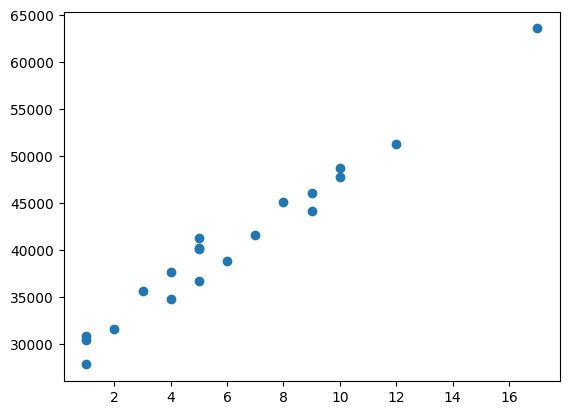

In [6]:
plt.scatter(smth['experience'], smth['income'])

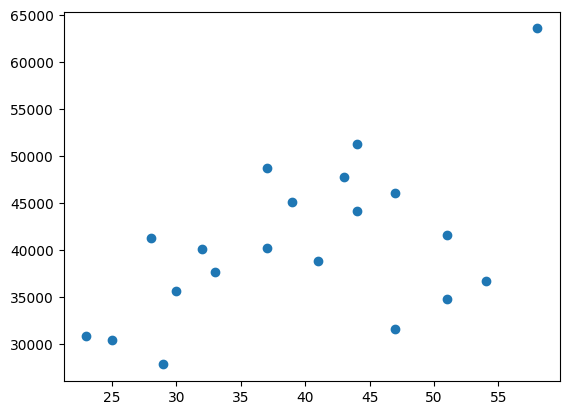

In [7]:
plt.scatter(smth['age'], smth['income'])

In [8]:
# From eyeball we can see that experience is a dominant variable rather than age
# because of the shape of the plot (straight line vs random scatter)

In [9]:
smth['y'] = smth['income']
smth['x1'] = smth['experience']
smth['x2'] = smth['age']

In [10]:
smth['x12'] = smth['x1']**2
smth['x22'] = smth['x2']**2
smth['x1x2'] = smth['x1'] * smth['x2']
smth['x1y'] = smth['x1'] * smth['y']
smth['x2y'] = smth['x2'] * smth['y']

In [11]:
b1 = (smth['x22'].sum() * smth['x1y'].sum() - smth['x1x2'].sum() * smth['x2y'].sum()) / ( smth['x12'].sum() * smth['x22'].sum() - smth['x1x2'].sum() ** 2)
b2 = (smth['x12'].sum() * smth['x2y'].sum() - smth['x1x2'].sum() * smth['x1y'].sum()) / ( smth['x12'].sum() * smth['x22'].sum() - smth['x1x2'].sum() ** 2)


In [12]:
b1, b2

(1532.010767507873, 746.1452299780375)

In [13]:
c = smth['y'].mean() - b1 * smth['x1'].mean() - b2 * smth['x2'].mean()
c

1652.3748728220016

In [14]:
smth['ypr'] = b1 * smth['x1'] + b2 * smth['x2'] + c

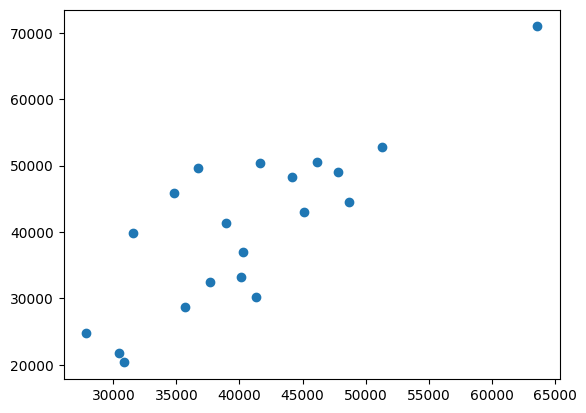

In [15]:
plt.scatter(smth['y'], smth['ypr'])

In [16]:
# No idea how to visualise graphically

In [17]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""

    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)

        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.cells:
                if cell.cell_type == 'code':
                    # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.source)
                    # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""

    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

In [18]:
import RegrMetrics

importing Jupyter notebook from RegrMetrics.ipynb


In [19]:
RegrMetrics.mae(smth['ypr'], smth['y'])

6210.633128581571

In [20]:
RegrMetrics.mse(smth['ypr'], smth['y'])

50459322.05525205

In [21]:
RegrMetrics.rmse(smth['ypr'], smth['y'])

7103.472534982595

In [22]:
RegrMetrics.rmsle(smth['ypr'], smth['y'])

8.868339032898321

In [23]:
RegrMetrics.rsqr(smth['ypr'], smth['y'], smth['y'].mean())

0.2543178621175516